In [ ]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [ ]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\BARANIDHARAN SIR PROJECT\X-Ray Images Dataset for research project-20211204T084221Z-001', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5171 images belonging to 3 classes.
Found 1292 images belonging to 3 classes.


In [ ]:
from keras.applications import densenet

DENSENET = Sequential()

densenet_model = keras.applications.densenet.DenseNet121(
    include_top=False, weights='imagenet',
    input_shape=(331,331,3), pooling='max', classes=3
)

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
for layer in densenet_model.layers:
    layer.trainable = False
    
DENSENET.add(densenet_model)
DENSENET.add(Flatten())
DENSENET.add(Dense(512,activation='relu'))
DENSENET.add(Dense(3, activation='softmax'))

DENSENET.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
DENSENET.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

graph = DENSENET.fit(train_generator, epochs=25, validation_data = validation_generator)

graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               524800    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 7,563,843
Trainable params: 526,339
Non-trainable params: 7,037,504
_________________________________________________________________
Epoch 1/25
162/162 [==============================] - 1365s 8s/step - loss: 0.8667 - accuracy: 0.6896 - val_loss: 0.5223 - val_accuracy: 0.7872
Epoch 2/25
162/162 [==============================] - 1348s 8s/step - loss: 0.6034 - accuracy:

Matplotlib is building the font cache; this may take a moment.


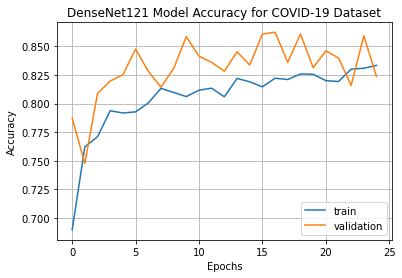

In [ ]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DenseNet121 Model Accuracy for COVID-19 Dataset')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [ ]:
max_acc = max(graph.history['val_accuracy'])

print('The highest accuracy achieved using DenseNet121 model is',max_acc*100)

The highest accuracy achieved using DenseNet121 model is 86.22291088104248
